# Sequence Models

- Like speech recognition to text, Music generation, text prediction, sentiment analysis, DNA sequence analysis, Machine translation(language translation), video activity recognition and name entity recognition (find names from sentence), etc.


## Representing Words

- A vocabulary is used, consisting of Common words used in language.The size of this vocabulary can vary based on the projects or company.
- This vocabulary is represented as a **one hot vector**, Which is Array of Zeros and only the index of the word will get the value one.
- The words, which are not available in the vocabulary Are marked with <unk>

![](https://cdn-images-1.medium.com/max/800/1*YFh3GZ41PgQWAnB_LfmJVw.png)

## Simplified RNN notation

- When the neural network reads the sentence, It feeds on the first word _X<sup><1></sup>_ and outputs the result _Y<sup><1></sup>_. At next timestamp it reads on the next word and proceeds.

    ![](http://persagen.com/files/misc/unfolded-RNN.png)

- **tanh** or **Relu** is used for activation function on _h<sub>t</sub>_. tanh is a common choice. Activation function for _Y<sub>`<t>`</sub>_ is based on its problem kind, for example sigmoid is used for binary classification.

    ![](https://www.yuthon.com/images/RNN_concept.png)


### Forward Propagation

- _f<sub>w</sub>_ is formed by stacking _W<sub>hh</sub>_ and _W<sub>xh</sub>_ side by side forming a matrix.

- _b<sub>y</sub>_ is a bias value added to this equation.

    ![](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fi.stack.imgur.com%2FEtV8U.png&f=1&nofb=1)

### Back Propagation through time

- Mostly DL frameworks takes care of backpropagation.

- The loss function is defined as the logistic regression loss (cross-entropy loss) for each time step, the total loss would be a summation of them.

- The backpropagation is done similarly like standard networks but done for each time stamp allowing to update parameters along each word. As this backpropagation along the timestamp is significant is known as backpropagation through time.

    ![](https://raw.githubusercontent.com/mmuratarat/mmuratarat.github.io/master/_posts/images/BPTT.png)

## Types of RNN

1. One-to-Many

   - Pass single value and the network provides a series of outputs
   - Eg. Music Generation

1. Many-to-Many

   - Input and output length may or may not be exactly same.
   - Eg. Machine translation - Translation from one language which has different lengths for input and output.
   - Here, The input is handled by a encoder that gets the input from one language with many words and the output will be provided by a decoder with many words of same or different length.

1. One-to-One
   - Need not be RNN, might be a simple Neural network.

1. Many-to-One
   - Takes all(many) input and provides one output at the end. 
   - Eg. Sentiment analysis, text classification.

    ![](https://static.javatpoint.com/tutorial/tensorflow/images/tensorflow-types-of-rnn.png)

# Language Model

- To build such a model in RNN, we need a training set of
  large corpus of english text. **_Corpus_** is a NLP terminology that means a very large set or body of text or sentences.
- First we need to tokenize the sentences and form a **_vocabulary_** of known words.
- While modelling, common thing is to add one more token `<eos>` to _represent the **end of the sentence**_. we can also decide whether to tokenize _punctuations_.
- Another details is that we can use `<unk>` or any unique token for _**unknown words** that are not present in vocabulary_. Say we have 10,000 most used words in english as vocabulary, we can use `<unk>` for other words.

![](https://miro.medium.com/max/1134/1*lhH8dFbK5_saNe4kcWXwiA.png)

# RNN Model

- We might end up setting input $x^{<t>} = y^{<t-1>}$. i.e, _the output of previous timestamp as the next input_.
- $\hat{y}^{<t>}$ is a 10000 way **_softmax output_**, if you have a 10000 word vocabulary.
- Each step of _RNN will look at some set of preceding words_. So, the RNN learns to predict one word at a time going from left to right.
- Next to train this Network, we _need a cost function_. Here, we can define a softmax loss function for the softmax prediction $\hat{y}^{<t>}$ and the true word $y^{<t>}$. And the overall loss would be the sum of loss predicted for all timestamps.
- At each step the model predicts the probability of the word at that step given the previous outputs

## Character-level RNN

- Depending on the application need we might build a character level or RNN, Where there vocabulary is alphabets (a-z), space, punctuation or even upper case letters if needed.
- The output $\hat{y}^{<t>}$ is the individual characters rather then individual words.
- They can assign the unknown words with non-zero probability as they predict words but the disadvantage is we end up with much longer sequences. Hence, character-level models are not good as the word-level models in catching long range dependencies and computationally expensive to train.

## Character-wise RNN

In [1]:
import torch
import torchvision                          # torch package for vision related things
import torch.nn.functional as F             # Parameterless functions, like (some) activation functions
import torchvision.datasets as datasets     # Standard datasets
import torchvision.transforms as transforms # Transformations we can perform on our dataset for augmentation
from torch import optim                     # For optimizers like SGD, Adam, etc.
from torch import nn                        # All neural network modules
from torch.utils.data import DataLoader     # Gives easier dataset management by creating mini batches etc.
from tqdm import tqdm                       # For a nice progress bar!
import matplotlib.pyplot as plt             # For Plots

/home/sannin/miniconda3/envs/torch/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
!mkdir -p Datasets/Character-RNN

In [3]:
# !wget https://download.pytorch.org/tutorial/data.zip -P Datasets/Character-RNN
!unzip Datasets/Character-RNN/data.zip -d Datasets/Character-RNN/

Archive:  Datasets/Character-RNN/data.zip
replace Datasets/Character-RNN/data/eng-fra.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


Arabic
5000 5.0 2.1064 Yun / Korean CORRECT
10000 10.0 1.9542 Jedlicka / Czech CORRECT
15000 15.0 1.5433 Ly / Korean WRONG (Vietnamese)
20000 20.0 2.0763 Rana / Spanish CORRECT
25000 25.0 1.6493 Otten / Dutch CORRECT
30000 30.0 1.2962 Tolbert / French CORRECT
35000 35.0 0.1642 Komatsuzaki / Japanese CORRECT
40000 40.0 2.1111 Lacey / Czech WRONG (English)
45000 45.0 0.3270 Orsini / Italian CORRECT
50000 50.0 2.3446 Stabile / French WRONG (Italian)
55000 55.00000000000001 1.4544 Lambton / French WRONG (English)
60000 60.0 1.9189 Abt / German CORRECT
65000 65.0 1.2884 Desrochers / Greek WRONG (French)
70000 70.0 2.4063 Mata / Japanese WRONG (Portuguese)
75000 75.0 0.5201 Yuasa / Japanese CORRECT
80000 80.0 1.7281 Maurice / French WRONG (Irish)
85000 85.0 0.7614 Bao / Chinese CORRECT
90000 90.0 1.7565 Ariwara / Czech WRONG (Japanese)
95000 95.0 3.9259 Gravari / Italian WRONG (Greek)
100000 100.0 0.0538 Gwozdek / Polish CORRECT


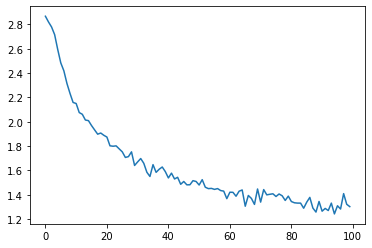

In [4]:
from utils import ALL_LETTERS, N_LETTERS
from utils import load_data, letter_to_tensor, line_to_tensor, random_training_example


class RNN(nn.Module):
    # implement RNN from scratch rather than using nn.RNN
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()
        
        self.hidden_size = hidden_size
        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)
        
    def forward(self, input_tensor, hidden_tensor):
        combined = torch.cat((input_tensor, hidden_tensor), 1)
        
        hidden = self.i2h(combined)
        output = self.i2o(combined)
        output = self.softmax(output)
        return output, hidden
    
    def init_hidden(self):
        return torch.zeros(1, self.hidden_size)
    
category_lines, all_categories = load_data()
n_categories = len(all_categories)

n_hidden = 128
rnn = RNN(N_LETTERS, n_hidden, n_categories)

# one step
input_tensor = letter_to_tensor('A')
hidden_tensor = rnn.init_hidden()

output, next_hidden = rnn(input_tensor, hidden_tensor)
#print(output.size())
#print(next_hidden.size())

# whole sequence/name
input_tensor = line_to_tensor('Albert')
hidden_tensor = rnn.init_hidden()

output, next_hidden = rnn(input_tensor[0], hidden_tensor)
#print(output.size())
#print(next_hidden.size())

def category_from_output(output):
    category_idx = torch.argmax(output).item()
    return all_categories[category_idx]

print(category_from_output(output))

criterion = nn.NLLLoss()
learning_rate = 0.005
optimizer = torch.optim.SGD(rnn.parameters(), lr=learning_rate)

def train(line_tensor, category_tensor):
    hidden = rnn.init_hidden()
    
    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)
        
    loss = criterion(output, category_tensor)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    return output, loss.item()

current_loss = 0
all_losses = []
plot_steps, print_steps = 1000, 5000
n_iters = 100000
for i in range(n_iters):
    category, line, category_tensor, line_tensor = random_training_example(category_lines, all_categories)
    
    output, loss = train(line_tensor, category_tensor)
    current_loss += loss 
    
    if (i+1) % plot_steps == 0:
        all_losses.append(current_loss / plot_steps)
        current_loss = 0
        
    if (i+1) % print_steps == 0:
        guess = category_from_output(output)
        correct = "CORRECT" if guess == category else f"WRONG ({category})"
        print(f"{i+1} {(i+1)/n_iters*100} {loss:.4f} {line} / {guess} {correct}")
        
    
plt.figure()
plt.plot(all_losses)
plt.show()

def predict(input_line):
    print(f"\n> {input_line}")
    with torch.no_grad():
        line_tensor = line_to_tensor(input_line)
        
        hidden = rnn.init_hidden()
    
        for i in range(line_tensor.size()[0]):
            output, hidden = rnn(line_tensor[i], hidden)
        
        guess = category_from_output(output)
        print(guess)
    

In [5]:
while True:
    sentence = input("Input:")
    if sentence.strip() == "quit" or sentence.strip() == "":
        break
    
    predict(sentence)


> pho
Portuguese

> chan
Irish

> robert
French

> mary
Scottish

> ing
Chinese

> jing
Chinese

> Abalakoff
Russian


# LSTM


## Vanishing Gradients

- One of the basic problems in RNN is it runs into vanishing gradients.
- Language can have longer dependencies, the earliest word can affect a word that comes later.
- For very deep neural networks, the gradient from output $\hat{y}$ can have very hard time propagating backwards to affect the weights of earlier layers. In RNN we have same problem.
- Exploding gradients can happen but it is easy to spot because the parameters value can blow causing `Nan` values. And, gradient clipping can be applied.

## Model

- LSTM model is similar to RNN but includes the concept of Gate and cell memory.

![](https://www.researchgate.net/profile/Ayan-Chatterjee-11/publication/341735802/figure/fig4/AS:896548204462080@1590765157069/a-A-vanilla-LSTM-cell-b-Equations-of-a-vanilla-LSTM-cell.ppm)

**RNN and LSTM comparison**

![](https://i.stack.imgur.com/Iv3nU.png)


## Sentiment Analysis using IMDB dataset

In [15]:
# Imports
import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchtext
from torchtext import data
from torchtext.datasets import imdb
import time
import random
# import pandas as pd
from torchtext.vocab import vocab
from collections import Counter, OrderedDict
from torchtext.data.functional import simple_space_split
from torchtext.data.functional import numericalize_tokens_from_iterator
import numpy as np

torch.backends.cudnn.deterministic = True

### Hyperparameters

In [16]:
RANDOM_SEED = 123
torch.manual_seed(RANDOM_SEED)

VOCABULARY_SIZE = 10000
LEARNING_RATE = 0.005
BATCH_SIZE = 64
NUM_EPOCHS = 15
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

EMBEDDING_DIM = 128
HIDDEN_DIM = 256
NUM_CLASSES = 2

### Dataset Prep

#### Extra

In [ ]:
# !wget https://github.com/rasbt/python-machine-learning-book-3rd-edition/raw/master/ch08/movie_data.csv.gz
# !gunzip -f movie_data.csv.gz 

In [ ]:
# df = pd.read_csv('movie_data.csv')
# print(df.head())
# del df

In [ ]:
# !python -m spacy download en_core_web_sm

In [ ]:
# ### Defining the feature processing

# TEXT = torchtext.data.field(
#     tokenize='spacy', # default splits on whitespace
#     tokenizer_language='en_core_web_sm'
# )

# ### Defining the label processing

# LABEL = torchtext.legacy.data.LabelField(dtype=torch.long)

# fields = [('TEXT_COLUMN_NAME', TEXT), ('LABEL_COLUMN_NAME', LABEL)]

# ### Process the dataset
# dataset = torchtext.legacy.data.TabularDataset(
#     path='movie_data.csv', format='csv',
#     skip_header=True, fields=fields)

In [ ]:
torchtext.__version__

#### Torchtext

In [17]:
!mkdir -p Datasets/LSTM

In [18]:
train_data, test_data = imdb.IMDB(root="Datasets/LSTM/", split=('train','test'))

In [19]:
line_tokens = []
label_tokens = []
def tokenize(line):
    return line.split()
for label, line in train_data:
    line_tokens += tokenize(line)
    label_tokens += tokenize(label)


In [20]:

print(line_tokens[:15])
print(label_tokens[:15])

['I', 'rented', 'I', 'AM', 'CURIOUS-YELLOW', 'from', 'my', 'video', 'store', 'because', 'of', 'all', 'the', 'controversy', 'that']
['neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg']


In [21]:
unk_token = '<unk>'
default_index = -1
line_counter = Counter(line_tokens)
# print(line_counter.most_common(10))
line_sorted_by_freq_tuples = sorted(line_counter.items(), key=lambda x: x[1], reverse=True)
# print(line_sorted_by_freq_tuples[:10])
line_dict = OrderedDict(line_sorted_by_freq_tuples[:VOCABULARY_SIZE])
line_vocab = vocab(line_dict, specials=[unk_token])
line_vocab = line_vocab.to(DEVICE)
line_vocab.set_default_index(default_index)
print(line_vocab['<unk>']) #prints 0
print(line_vocab['out of vocab']) #prints -1
#make default index same as index of unk_token
line_vocab.set_default_index(line_vocab[unk_token])
line_vocab['out of vocab'] is line_vocab[unk_token] #prints True

label_counter = Counter(label_tokens)
sorted_by_freq_tuples = sorted(label_counter.items(), key=lambda x: x[1], reverse=True)
label_dict = OrderedDict(sorted_by_freq_tuples)
label_vocab = vocab(label_dict)
label_vocab = label_vocab.to(DEVICE)


0
-1


In [22]:
# Lines Vocab
print(line_vocab.get_itos()[:10])
print(line_vocab.get_stoi()['has'])
# Label Vocab
print(label_dict)
print(label_vocab.get_itos())
print(label_vocab.get_stoi())

['<unk>', 'the', 'a', 'and', 'of', 'to', 'is', 'in', 'I', 'that']
38
OrderedDict([('neg', 12500), ('pos', 12500)])
['neg', 'pos']
{'pos': 1, 'neg': 0}


In [23]:
for label,line in train_data:
    line_ids_iter = numericalize_tokens_from_iterator(line_vocab, simple_space_split([line]))
    print(next(line_ids_iter))
    break

<generator object numericalize_tokens_from_iterator.<locals>.<genexpr> at 0x7f6ba9db4270>


In [27]:
for i, (label,line) in enumerate(train_data):
    line_ids_iter = numericalize_tokens_from_iterator(line_vocab, simple_space_split([line]))
    tens = torch.from_numpy(np.fromiter(next(line_ids_iter), int))
    print(list(tens.size()))
    tens = torch.nn.functional.pad(tens,(1,500),"constant", 0)
    print(list(tens[:100].size()))
    one_h = torch.nn.functional.one_hot(tens, len(line_vocab))
    print(list(one_h.size()))
    print(one_h)
    break  


[288]
[100]
[789, 10001]
tensor([[1, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [1, 0, 0,  ..., 0, 0, 0],
        [1, 0, 0,  ..., 0, 0, 0],
        [1, 0, 0,  ..., 0, 0, 0]])


In [28]:
line_vocab.__len__()

10001

In [29]:
# import spacy


# nlp = spacy.blank("en")
# for i, (label, line) in enumerate(train_data):
#     tokenized = [tok.text for tok in nlp.tokenizer(line)]
#     indexed = [line_vocab.__getitem__(t) for t in tokenized]
#     length = [len(indexed)]
#     tensor = torch.LongTensor(indexed).to(DEVICE)
#     tensor = tensor.unsqueeze(1)    
#     length_tensor = torch.LongTensor(length)
#     print(len(tokenized))
#     print(len(indexed))
#     print(list(tensor.size()))
#     if i >3 :
#         break

In [30]:
class Imdb_Iter_dataset(torch.utils.data.IterableDataset):
    def __init__(self, iter_dataset):
        super(Imdb_Iter_dataset).__init__()
        self.dataset = iter_dataset 
    def padding(batch):
        doc = [doc['line'] for doc in batch]
        len_doc = [len(doc['input']) for doc in batch]
        doc_pad = pad_sequence(doc, batch_first=True, padding_value=0)
        return doc_pad, len_doc
    def __iter__(self):
        for label,line in self.dataset:
            label_ids_iter = numericalize_tokens_from_iterator(label_vocab, simple_space_split([label]))
            line_ids_iter = numericalize_tokens_from_iterator(line_vocab, simple_space_split([line]))
            label_tensor = torch.from_numpy(np.fromiter(next(label_ids_iter), int))
            line_tensor = torch.from_numpy(np.fromiter(next(line_ids_iter), int))
            one_h = torch.nn.functional.one_hot(line_tensor[:30], len(line_vocab))
            # torch.nn.functional.pad(input=[500, 10001]) .to(device=DEVICE)
            yield {"label":label_tensor, "line":one_h}

In [18]:
train_iter_data = Imdb_Iter_dataset(train_data)
test_iter_data = Imdb_Iter_dataset(test_data)

In [19]:
for i,j in enumerate(train_iter_data):
    print(j['line'].size())
    # print(j.size())
    # print(k.size())
    if i > 2 :
        break

torch.Size([30, 10001])
torch.Size([30, 10001])
torch.Size([30, 10001])
torch.Size([30, 10001])


In [20]:
# class SimpleCustomBatch:
#     def __init__(self, data):
#         print(len(data))
#         transposed_data = list(zip(*data))
#         self.inp = torch.stack(transposed_data[0], 0)
#         self.tgt = torch.stack(transposed_data[1], 0)

#     # custom memory pinning method on custom type
#     def pin_memory(self):
#         self.inp = self.inp.pin_memory()
#         self.tgt = self.tgt.pin_memory()
#         return self

# def collate_wrapper(batch):
#     return SimpleCustomBatch(batch)

In [21]:

train_loader = DataLoader(train_iter_data, batch_size=BATCH_SIZE)
test_loader = DataLoader(test_iter_data, batch_size=BATCH_SIZE)

In [22]:
# for i,batch in enumerate(train_loader):
#     print(i)
#     print(type(batch["line"]))
#     break

In [23]:
# print('Train')
# for batch in train_loader:
#     print(f'Text matrix size: {len(batch[1])}')
#     print(f'Text matrix type: {type(batch[1])}')
#     print(f'Text matrix size: {batch[1]}')

#     print(f'Target vector size: {len(batch[0])}')
#     print(f'Target vector type: {type(batch[0])}')
#     print(f'Target vector size: {batch[0]}')

#     break

In [24]:
class LSTM(torch.nn.Module):
    
    def __init__(self, input_dim, embedding_dim, hidden_dim, output_dim):
        super().__init__()

        self.embedding = torch.nn.Embedding(input_dim, embedding_dim)
        self.rnn = torch.nn.LSTM(embedding_dim,
                                 hidden_dim)        
        
        self.fc = torch.nn.Linear(hidden_dim, output_dim)
        

    def forward(self, text):
        # text dim: [sentence length, batch size]
        
        embedded = self.embedding(text)
        # embedded dim: [sentence length, batch size, embedding dim]
        
        output, (hidden, cell) = self.rnn(embedded)
        # output dim: [sentence length, batch size, hidden dim]
        # hidden dim: [1, batch size, hidden dim]

        hidden.squeeze_(0)
        # hidden dim: [batch size, hidden dim]
        
        output = self.fc(hidden)
        return output

In [25]:
torch.manual_seed(RANDOM_SEED)
model = LSTM(input_dim=len(line_vocab),
            embedding_dim=EMBEDDING_DIM,
            hidden_dim=HIDDEN_DIM,
            output_dim=NUM_CLASSES # could use 1 for binary classification
)

model = model.to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)

In [26]:
def compute_accuracy(model, data_loader, device):

    with torch.no_grad():

        correct_pred, num_examples = 0, 0

        for i, (features, targets) in enumerate(data_loader):

            features = features.to(device)
            targets = targets.float().to(device)

            logits = model(features)
            _, predicted_labels = torch.max(logits, 1)

            num_examples += targets.size(0)
            correct_pred += (predicted_labels == targets).sum()
    return correct_pred.float()/num_examples * 100

In [ ]:
start_time = time.time()

for epoch in range(NUM_EPOCHS):
    model.train()
    for batch_idx, batch_data in enumerate(train_loader):
        
        text = batch_data["line"].to(DEVICE)
        labels = batch_data["label"].to(DEVICE)

        ### FORWARD AND BACK PROP
        logits = model(text)
        loss = F.cross_entropy(logits, labels)
        optimizer.zero_grad()
        
        loss.backward()
        
        ### UPDATE MODEL PARAMETERS
        optimizer.step()
        
        ### LOGGING
        if not batch_idx % 50:
            print (f'Epoch: {epoch+1:03d}/{NUM_EPOCHS:03d} | '
                   f'Batch {batch_idx:03d}/{len(train_loader):03d} | '
                   f'Loss: {loss:.4f}')

    with torch.set_grad_enabled(False):
        print(f'training accuracy: '
              f'{compute_accuracy(model, train_loader, DEVICE):.2f}%')
        
    print(f'Time elapsed: {(time.time() - start_time)/60:.2f} min')
    
print(f'Total Training Time: {(time.time() - start_time)/60:.2f} min')
print(f'Test accuracy: {compute_accuracy(model, test_loader, DEVICE):.2f}%')

# References

* https://www.coursera.org/learn/nlp-sequence-models
* https://github.com/cedricdeboom/character-level-rnn-datasets
* https://github.com/MycroftAI/rnn-demo
* https://github.com/python-engineer/pytorch-examples/tree/master/rnn-name-classification
* https://github.com/rasbt/stat453-deep-learning-ss21/blob/main/L15/1_lstm.ipynb
* https://github.com/aladdinpersson/Machine-Learning-Collection
* https://towardsdatascience.com/rnn-recurrent-neural-networks-how-to-successfully-model-sequential-data-in-python-5a0b9e494f92
* https://www.simplilearn.com/tutorials/deep-learning-tutorial/rnn
* https://github.com/python-engineer/pytorch-examples/tree/master/rnn-lstm-gru